In [11]:
#importing all required keras libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from collections import deque
num_classes = 10
batch_size = 250
epochs = 10

In [12]:
#loading dataset(already has test,train sets)
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#reshaping the datasets and also normalizing it
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255
#converting dataset(labels) to binary
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)



In [13]:
#neural network structure
model = Sequential()
#1st convolution layer
model.add(Conv2D(32, (3, 3)
 ,input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Fully connected layer.
model.add(Dense(512))
model.add(Activation('relu'))
#10 outputs
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [14]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)
#Training
model.compile(loss='categorical_crossentropy'
  , optimizer=keras.optimizers.Adam()
 , metrics=['accuracy']
)

model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs,
	validation_data=(x_test, y_test)
)


Epoch 1/10
250/250 [==============================] - 13s 51ms/step - loss: 0.2229 - acc: 0.9361 - val_loss: 0.0608 - val_acc: 0.9797
Epoch 2/10
250/250 [==============================] - 13s 51ms/step - loss: 0.0547 - acc: 0.9832 - val_loss: 0.0398 - val_acc: 0.9880
Epoch 3/10
250/250 [==============================] - 13s 52ms/step - loss: 0.0386 - acc: 0.9879 - val_loss: 0.0318 - val_acc: 0.9887
Epoch 4/10
250/250 [==============================] - 13s 52ms/step - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 5/10
250/250 [==============================] - 13s 53ms/step - loss: 0.0220 - acc: 0.9934 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 6/10
250/250 [==============================] - 13s 52ms/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0275 - val_acc: 0.9912
Epoch 7/10
250/250 [==============================] - 13s 53ms/step - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0287 - val_acc: 0.9907
Epoch 8/10
250/250 [==============================] - 13s 54ms

In [15]:
#test the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
predictions = model.predict(x_test)

('Test loss:', 0.025933161903122254)
('Test accuracy:', 99.25)


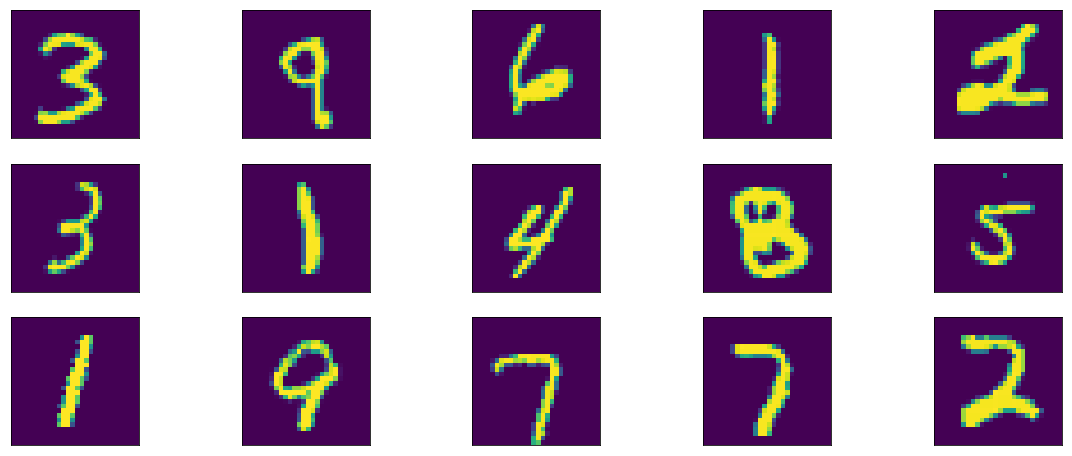

In [17]:
import matplotlib.pyplot as plt

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))